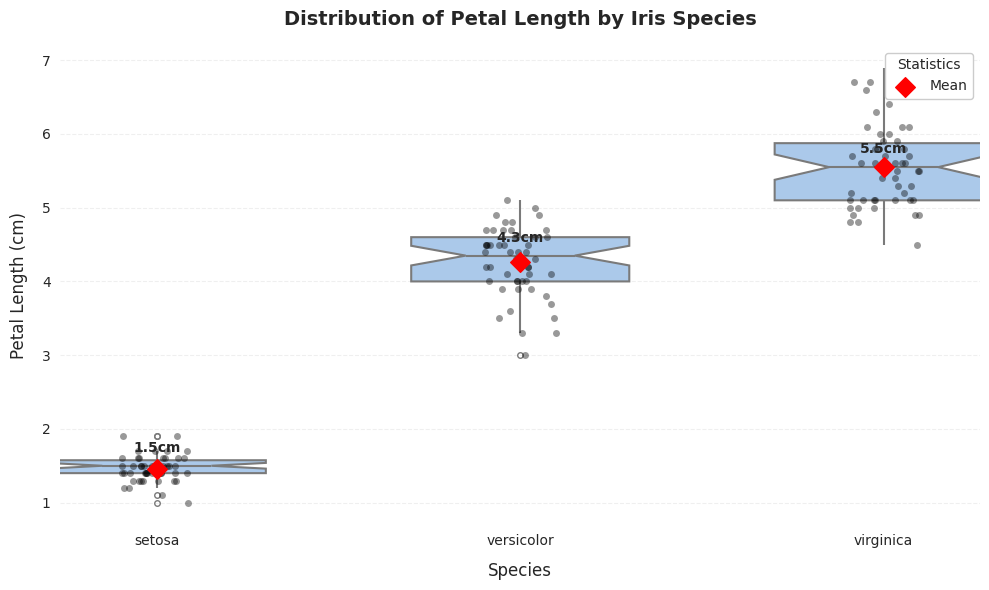

In [1]:
# Customizing Plots with Seaborn - Boxplot
# Objective: Customize a boxplot with Seaborn to show the distribution of petal lengths by
# species.
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Set up the figure with custom style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
sns.set_palette("pastel")  # Soft color palette

# Create customized boxplot
boxplot = sns.boxplot(
    data=iris,
    x='species',
    y='petal_length',
    width=0.6,          # Adjust box width
    linewidth=1.5,      # Box border thickness
    fliersize=4,        # Outlier marker size
    notch=True,         # Add notches for CI
    showcaps=False      # Remove end caps
)

# Add stripplot for actual data points
stripplot = sns.stripplot(
    data=iris,
    x='species',
    y='petal_length',
    color='black',
    alpha=0.4,
    size=5,
    jitter=0.1
)

# Customize titles and labels
plt.title('Distribution of Petal Length by Iris Species', 
         fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Species', fontsize=12, labelpad=10)
plt.ylabel('Petal Length (cm)', fontsize=12, labelpad=10)

# Add mean markers
means = iris.groupby('species')['petal_length'].mean()
for i, species in enumerate(means.index):
    plt.scatter(i, means[species], 
               color='red', 
               marker='D', 
               s=100,
               label='Mean' if i == 0 else "",
               zorder=10)

# Customize legend
plt.legend(title='Statistics', 
          loc='upper right',
          frameon=True,
          framealpha=1)

# Add horizontal grid lines
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

# Add annotations for important values
for i, species in enumerate(iris['species'].unique()):
    median = iris[iris['species'] == species]['petal_length'].median()
    boxplot.text(i, median+0.15, f'{median:.1f}cm', 
                ha='center', 
                va='bottom',
                fontsize=10,
                fontweight='bold')

plt.tight_layout()
plt.show()